In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

1. La somme des termes ∆tI est égale à la consommation (en Ah) lors du trajet qui doit nécessairement être inférieure à la capacité nominale de la batterie, d'où l'obtention de la contrainte 4). En autorisant les valeurs négatives dans la contrainte 3), on pourrait prendre en compte le cas des véhicules qui se rechargent au freinage, tout en gardant notre contrainte 4) inchangée.

2. 
- α1: En prenant tous les autres coefficients nuls et une vitesse initiale nulle on constate que celui-ci conduit à une augmentation ou diminution de la vitesse on peut imaginer qu'il s'agit alors d'un coefficient lié à la vitesse du vent : négatif si le vent est défavorable et positif sinon.
- α2: Coefficient quantifiant les frottements visqueux.
- α3 : Coefficient quantifiant l'apport de l'assistance éléctrique dans l'accéleration du vélo.
- α4 : Coefficient quantifiant l'apport du pédalage du cycliste dans l'accéleration du vélo.

Impact du poids: à priori la masse du cycliste ne modifient pas les coefficients 1 et 2 ou seulement marginalement car les variations des coefficients de frottements dû à l'impact de la masse du cycliste sur sa prise au vent sont négligeables.

Les coefficients 3 et 4 dépendent également probablement plutôt des caractéristiques du vélo que de la masse du cycliste.

3. On définit $\mathbf{z}$ : 

$$
\mathbf{z} = \begin{pmatrix}
T_0 \\
T_1 \\
\vdots \\
T_N \\
x_0 \\
x_1 \\
\vdots \\
x_N \\
v_0 \\
v_1 \\
\vdots \\
v_n \\
I_0 \\
I_1 \\
\vdots \\
I_N

\end{pmatrix} \in \mathbb{R}^{4N+4}
$$

On note $\alpha = (\alpha_1, \alpha_2, \alpha_3, \alpha_4) \in \mathbb{R}^4 $

Le problème des moindres carrés correspondant à l'identification de $\alpha$ dans (2) est : 

$ \alpha = argmin_{x \in \mathbb{R}^4}||Dx^T-(v_{réelle}(i+1)-v_{réelle}(i))||^2 $ où, $ \forall i \in [0, N], D_{i, \cdot} = \Delta t(1, -v_i, I(i), T(i))$ et $v_{réelle,i} = v(i) $

0.009996924023377422
[-0.29420791  0.02131773  0.02853839  0.01429096]


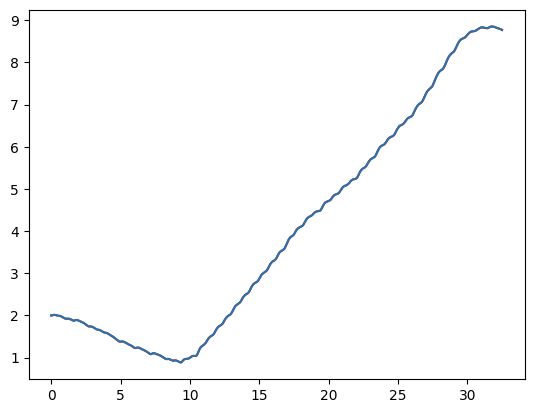

In [179]:
df = pd.read_csv("data_velo.csv")

vitesse = df["Vitesse [m/s]"].tolist()
intensite = df["I [A]"].tolist()
couple = df["Couple pédale [Nm]"].tolist()
temps = df["Time [s]"].tolist()

N = len(temps)
deltat = max(temps)/N
print(deltat)

D = np.array([[deltat, -deltat*vitesse[i], deltat*intensite[i], deltat*couple[i]] for i in range(N)])
#print(D)

vitesse_decalee = vitesse[1:] + [vitesse[-1]]

alpha = np.linalg.lstsq(D, np.array(vitesse_decalee) - np.array(vitesse), rcond=None)[0]

print(alpha)


vitesse_simulee = [vitesse[0]]
for i in range(N-2): 
    vitesse_simulee.append(vitesse_simulee[i] + deltat*(alpha[0] - alpha[1]*vitesse_simulee[i] + alpha[2]*intensite[i] + alpha[3]*couple[i]))

plt.plot(temps, vitesse, 'r')
plt.plot(temps[:N-1], vitesse_simulee)

7.a) 
On considère la matrice $A = A^T_kA_k$ définie positive (par hypothèse), et on définit $ U=a_{k+1} \in M _{m,1}(\mathbb{R})$.
On a donc aussi $\tilde{A} = A^T_{k+1}A_{k+1}$ qui est inversible. Ainsi, d'après la formule de SHerman-Morrison-Woodburry :
$$ \tilde{A}^{-1} = A^{-1} - A^{-1}U(I_p + U^TA^{-1}U)^{-1}U^TA^{-1}$$
Donc comme $p=1$ et $U=a_{k+1}$ :  
$$ \tilde{A}^{-1} = A^{-1} - A^{-1}a_{k+1}\frac{1}{1 + a_{k+1}^TA^{-1}a_{k+1}}a_{k+1}^TA^{-1}$$

Avec  $A = A^T_kA_k$ et en introduisant $\gamma_k = \frac{1}{1 + a_{k+1}^TA^{-1}a_{k+1}}$ :  
$$ \tilde{A}^{-1} = (A^T_kA_k)^{-1} - \gamma_k(A^T_kA_k)^{-1}a_{k+1} a_{k+1}^T(A^T_kA_k)^{-1}$$

Avec $K_k = \gamma_k(A^T_kA_k)^{-1}a_{k+1}$ on obtient : 

$$ \tilde{A}^{-1} = (A^T_kA_k)^{-1} - K_k a_{k+1}^T(A^T_kA_k)^{-1}$$

7. b)
Par définition, on a:
$$x_{k+1} = (A^T_{k+1}A_{k+1})^{-1}A^T_{k+1}b_{k+1} =  \tilde{A}^{-1}A^T_{k+1}b_{k+1}$$
D'où, avec la 7.a) :

$$
\begin{align*}
    x_{k+1} & = [(A^T_kA_k)^{-1} - K_k a_{k+1}^T(A^T_kA_k)^{-1}]A^T_{k+1}b_{k+1} \\
            & = \quad(A^T_kA_k)^{-1}A^T_{k+1}b_{k+1}- K_k a_{k+1}^T(A^T_kA_k)^{-1}A^T_{k+1}b_{k+1}
\end{align*}
$$

Or : $A^T_{k+1}b_{k+1} = (A^T_k, a_{k+1})(b_k, \tilde{b}) = A^T_kb_k + \tilde{b}a_{k+1}$

Donc : 

$$
\begin{align*}
    x_{k+1} &= (A^T_kA_k)^{-1}(A^T_kb_k + \tilde{b}a_{k+1})- K_k a_{k+1}^T(A^T_kA_k)^{-1}(A^T_kb_k + \tilde{b}a_{k+1}) \\
            & = \quad x_k + \tilde{b}(A^T_kA_k)^{-1} a_{k+1}- K_k a_{k+1}^Tx_k - \tilde{b}K_k a_{k+1}^T(A^T_kA_k)^{-1}a_{k+1} \\
            & = \quad x_k + \frac{\tilde{b}}{\gamma_k}K_k- K_k a_{k+1}^Tx_k - \tilde{b}K_k a_{k+1}^T(A^T_kA_k)^{-1}a_{k+1} \\
            & = \quad x_k + K_k(\frac{\tilde{b}}{\gamma_k}- a_{k+1}^Tx_k - \tilde{b}a_{k+1}^T(A^T_kA_k)^{-1}a_{k+1}) \\
            & = \quad x_k + K_k(\frac{\tilde{b}}{\gamma_k}- a_{k+1}^Tx_k - \tilde{b}(\frac{1}{\gamma_k}-1)) \\
            & = \quad x_k + K_k(\tilde{b}- a_{k+1}^Tx_k)
\end{align*}
$$

7. c)
On peut definir un algorithme ne nécessitant pas d'inversion de matrices au cours des itérations car en exprimant $x_{k+1}$ en fonction de $x_k$, l'inversion apparaît dans $K_k$. Or il est question d'inverser $(A^T_kA_k)$, chose que nous pouvons faire sans le calculer explicitement étant donnée la relation de récurrence (7).

In [184]:
a = np.array([[deltat, -deltat*vitesse[i], deltat*intensite[i], deltat*couple[i]] for i in range(N)])
b = np.array([[vitesse_decalee[i]-vitesse[i]] for i in range(N-1)])


def SMW(n):
    if n == 4 :
        A = np.vstack((a[0], a[1], a[2], a[3], a[4]))
        return np.linalg.inv(np.dot(np.transpose(A), A))
    
    elif n > 4 : 
        gamma = 1/(1 + np.dot(a[n], np.dot(SMW(n-1), a[n])))
        K = gamma * np.dot(SMW(n-1), a[n])
        return SMW(n-1) - np.dot(np.outer(K, a[n]), SMW(n-1))
    else :
        return 'n doit être supérieur à 4'



def moindres_carres_recursifs(n):
    if n == 4 :
        return np.array([0, 0, 0, 0])
    
    elif n > 4 : 
        gamma = 1/(1 + np.dot(a[n], np.dot(SMW(n-1), a[n])))
        K = gamma * np.dot(SMW(n-1), a[n])
        return moindres_carres_recursifs(n-1) + K*(b[n] - np.dot(a[n],moindres_carres_recursifs(n-1)))
    
    else : 
        'n doit être supérieur à 4'


moindres_carres_recursifs(13)

array([-4.81234439e+01, -2.40126004e+01,  2.45531159e-03,  6.57332565e-03])

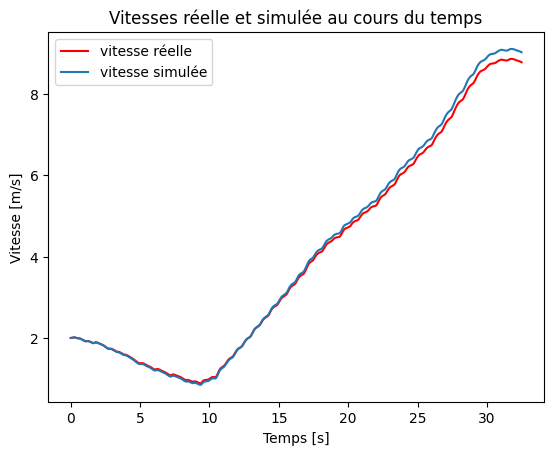

In [188]:
vitesse_simulee2= [vitesse[0]]
alpha2 = moindres_carres_recursifs(13)
for i in range(N-2): 
    vitesse_simulee2.append(vitesse_simulee[i] + deltat*(alpha2[0] - alpha2[1]*vitesse_simulee[i] + alpha2[2]*intensite[i] + alpha2[3]*couple[i]))

plt.plot(temps, vitesse, 'r', label='vitesse réelle')
plt.plot(temps[:N-1], vitesse_simulee2, label='vitesse simulée')
plt.title('Vitesses réelle et simulée au cours du temps')
plt.xlabel('Temps [s]')
plt.ylabel('Vitesse [m/s]')
plt.legend()
plt.show()

L'algorithme récursif ne doit pas etre optimisé mais je ne comprends pas vraiment d'ou cela provient. Lorsuq'on essaie de l'executer pour des valeurs supereieures à 15, il met plus d'une minute à s'éxecuter. J'ai donc essayé de rassembler les deux fonctions en une seule pour faire moins d'appel et diminuer la complexité mais au contraire ca a tendance a rendre la convergence plus lente. Malgré tout comme le ontre le graphe ci-dessus, on obtient une courbe de vitesse qui se superpose bien à la courbe de vitesse réelle.

In [185]:
a = np.array([[deltat, -deltat*vitesse[i], deltat*intensite[i], deltat*couple[i]] for i in range(N)])
b = np.array([[vitesse_decalee[i]-vitesse[i]] for i in range(N-1)])


def moindres_carres_recursifs_complet(n):
    if n == 4 :
        A = np.vstack((a[0], a[1], a[2], a[3], a[4]))
        return (np.linalg.inv(np.dot(np.transpose(A), A)), np.array([0, 0, 0, 0]))
    
    elif n > 4 : 
        gamma = 1/(1 + np.dot(a[n], np.dot(moindres_carres_recursifs_complet(n-1)[0], a[n])))
        K = gamma * np.dot(moindres_carres_recursifs_complet(n-1)[0], a[n])
        return (moindres_carres_recursifs_complet(n-1)[0] - np.dot(np.outer(K, a[n]), moindres_carres_recursifs_complet(n-1)[0]), moindres_carres_recursifs_complet(n-1)[1] + K*(b[n] - np.dot(a[n], moindres_carres_recursifs_complet(n-1)[1])))
    
    else : 
        'n doit être supérieur à 4'


moindres_carres_recursifs_complet(8)[1]

array([-4.40613077e+01, -2.19799499e+01,  1.32952947e-03,  7.33184945e-03])

# 3e partie


9. Il y a en toute généralité un autre terme à prendre en compte lié à la pente de la route lorsqu'on n'est plus en terrain plat. En l'occurence ce terme est une fonction de la position $\gamma$ qui n'est pas linéaire en $x_i$.

Si la pente est nulle, la fonction f ne dépend plus que de 

On définit $\mathbf{z}$ : 

$$
\mathbf{z} = \begin{pmatrix}
T_0 \\
T_1 \\
\vdots \\
T_N \\
x_0 \\
x_1 \\
\vdots \\
x_N \\
v_0 \\
v_1 \\
\vdots \\
v_n \\
I_0 \\
I_1 \\
\vdots \\
I_N

\end{pmatrix} \in \mathbb{R}^{4N+4}
$$

$$
\mathbf{c_{éq, 1}}(z) = \begin{pmatrix}
x_1 - x_0 - \Delta t v_0 \\
x_2 - x_1 - \Delta t v_1 \\
\vdots \\
x_N - x_{N-1} - \Delta t v_{N-1}
\end{pmatrix} \in \mathbb{R}^N
$$

$$
\mathbf{c_{éq, 2}}(z) = \begin{pmatrix}
v_1 - v_0 + \Delta t (\alpha_1 - \alpha_2 v_0 + \alpha_3 I_0 + \alpha_4 T_0 - g\gamma(x_0)) \\
v_2 - v_1 + \Delta t (\alpha_1 - \alpha_2 v_1 + \alpha_3 I_1 + \alpha_4 T_1 - g\gamma(x_1)) \\
\vdots \\
v_N - v_{N-1} + \Delta t (\alpha_1 - \alpha_2 v_{N-1} + \alpha_3 I_{N-1} + \alpha_4 T_{N-1} - g\gamma(x_{N-1})) 
\end{pmatrix} \in \mathbb{R}^N
$$

$$
\mathbf{c_{eq, 3}}(z) = x_0 \in \mathbb{R}
$$

$$
\mathbf{c_{eq, 4}}(z) = x_N - x_f \in \mathbb{R}
$$ 

$$
\mathbf{c_{eq, 5}}(z) = v_0 \in \mathbb{R}
$$

$$
\mathbf{c_{eq, 6}}(z) = v_N \in \mathbb{R}
$$

$$
\mathbf{c_{in, 7}}(z) = \begin{pmatrix}
I_0 - I_M \\
I_1 - I_M \\
\vdots \\
I_N - I_M
\end{pmatrix} \in \mathbb{R}^{N+1}
$$

$$
\mathbf{c_{in, 8}}(z) = \begin{pmatrix}
-I_0 \\
-I_1 \\
\vdots \\
-I_N
\end{pmatrix} \in \mathbb{R}^{N+1} 
$$

$$
\mathbf{c_{in, 9}}(z) = \sum_{i = 0}^{N} \Delta t I_i - Q_{bat} \in \mathbb{R}
$$

$$
\mathbf{c_{in, 10}}(z) = \begin{pmatrix}
-v_0 \\
-v_1 \\
\vdots \\
-v_N
\end{pmatrix} \in \mathbb{R}^{N+1} 
$$

$$
\mathbf{c_{in, 11}}(z) = \begin{pmatrix}
-T_0 \\
-T_1 \\
\vdots \\
-T_N
\end{pmatrix} \in \mathbb{R}^{N+1} 
$$

In [139]:
#Fonction à minimiser

def f(z):
    z = np.array(z)
    return (np.sum(z[0 : N+1]**2))


# Définition des contraintes

def c1(z):
    z = np.array(z)
    return z[N+2 : 2*N+2] - z[N+1 : 2*N+1] - deltat * z[2*N+2 : 3*N+2]

def c2(z):
    z = np.array(z)
    return z[2*N+3 : 3*N+3] - z[2*N+2 : 3*N+2] + deltat * ( alpha_1 - alpha_2 * z[2*N+2 : 3*N+2] + alpha_3 * z[3*N+3 : 4*N+3] + alpha_4 * z[0 : N] )

def c3(z) : 
    return z[N+1] - x_0 #position initiale

def c4(z) : 
    return z[2*N+1] - x_f #position finale

def c5(z) : 
    return z[2*N+2] #vitesse initiale nulle

def c6(z) : 
    return z[3*N+2] #vitesse finale nulle

def c7(z):
    z = np.array(z)
    return I_M - z[3*N+3 : 4*N+4] 

def c8(z): 
    z = np.array(z)
    return  z[3*N+3 : 4*N+4]

def c9(z): 
    z = np.array(z)
    return Q_bat - deltat * np.sum(z[3*N+3 : 4*N+4])

def c10(z) : 
    return z[2*N+2 : 3*N+3] # vitesse positive

def c11(z) : 
    return z[3*N+3 : 4*N+4] #couple positif


contraintes = ({'type' : 'eq', 'fun' : c1}, {'type' : 'eq', 'fun' : c2}, {'type' : 'eq', 'fun' : c3}, {'type' : 'eq', 'fun' : c4}, 
               {'type' : 'eq', 'fun' : c5}, {'type' : 'eq', 'fun' : c6}, {'type' : 'ineq', 'fun' : c7}, {'type' : 'ineq', 'fun' : c8}, 
               {'type' : 'ineq', 'fun' : c9}, {'type' : 'ineq', 'fun' : c10}, {'type' : 'ineq', 'fun' : c11})






10. On fait la simulation numérique

In [191]:
T = 100
deltat = 2.5
N = int(T/deltat)
Q_bat = 700
I_M = 30
x_0 = 0
x_f = 500
alpha_1, alpha_2, alpha_3, alpha_4 = alpha

#Choix des variables initiales : 

couple_init = [0 for i in range (N+1)]
position_init = [12.5*i for i in range(N+1)] #vitesse uniforme
vitesse_init = [5 for i in range(N+1)] #vitesse uniforme
intensite_init = [0.3 for i in  range(N+1)] #on se rapproche de la contraitne Q_bat

z_init = np.array(couple_init + position_init + vitesse_init + intensite_init)

#Minimisation sous contraintes

sol = minimize(f, z_init, constraints = contraintes)

temps_sol = [2.5*i for i in range(N+1)]
couple_sol = sol.x[0:N+1]
position_sol = sol.x[N+1:2*N+2]
vitesse_sol = sol.x[2*N+2:3*N+3]
intensite_sol = sol.x[3*N+3:4*N+4]

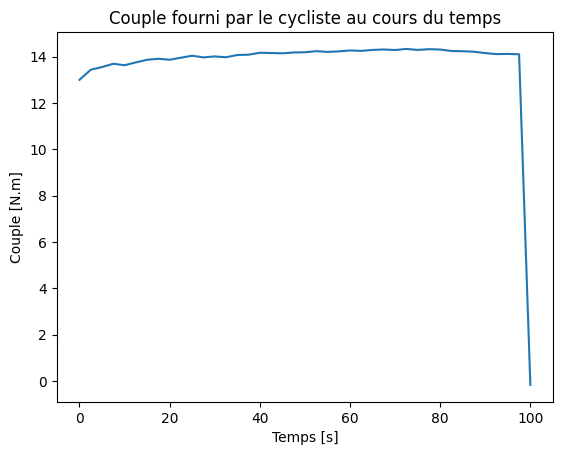

In [192]:
plt.plot(temps_sol, couple_sol)
plt.title('Couple fourni par le cycliste au cours du temps')
plt.xlabel('Temps [s]')
plt.ylabel('Couple [N.m]')
plt.show()

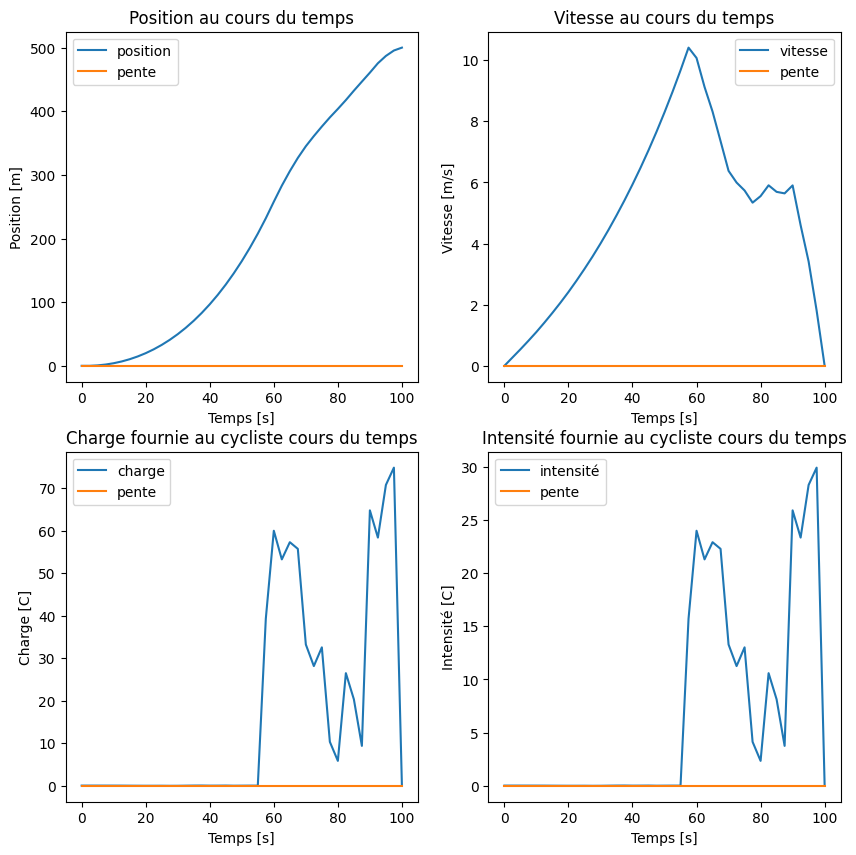

In [198]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes[0, 0].plot(temps_sol, position_sol, label='position')
axes[0, 0].plot(temps_sol, [0 for i in range(N+1)], label='pente')
axes[0, 0].set_title('Position au cours du temps')
axes[0, 0].set_xlabel('Temps [s]')
axes[0, 0].set_ylabel('Position [m]')
axes[0, 0].legend()


axes[0, 1].plot(temps_sol, vitesse_sol, label='vitesse')
axes[0, 1].plot(temps_sol, [0 for i in range(N+1)], label='pente')
axes[0, 1].set_title('Vitesse au cours du temps')
axes[0, 1].set_xlabel('Temps [s]')
axes[0, 1].set_ylabel('Vitesse [m/s]')
axes[0, 1].legend()


axes[1, 0].plot(temps_sol, deltat*intensite_sol, label='charge')
axes[1, 0].plot(temps_sol, [0 for i in range(N+1)], label='pente')
axes[1, 0].set_title('Charge fournie au cycliste cours du temps')
axes[1, 0].set_xlabel('Temps [s]')
axes[1, 0].set_ylabel('Charge [C]')
axes[1, 0].legend()


axes[1, 1].plot(temps_sol, intensite_sol, label='intensité')
axes[1, 1].plot(temps_sol, [0 for i in range(N+1)], label='pente')
axes[1, 1].set_title('Intensité fournie au cycliste cours du temps')
axes[1, 1].set_xlabel('Temps [s]')
axes[1, 1].set_ylabel('Intensité [C]')
axes[1, 1].legend()

On vérifie bien que les contraintes de positions et vitesses initiales et finales sont correctes. De plus on observe que la contrainte ffaisant intervenir $Q_{bat}$ est active

In [197]:
print('La charge totale fournie par le moteur au cycliste vaut', deltat*np.sum(intensite_sol), 'C')

La charge totale fournie par le moteur au cycliste vaut 700.5542493331604 C


11. 

In [ ]:
def pente(x, gamma1, gamma2, mu1, mu2, sigma1, sigma2):
    return gamma1*np.exp(- (x - mu1)**2 / sigma1**2) + gamma2*np.exp(- (x - mu2)**2 / sigma2**2)

In [ ]:
#Fonction à minimiser

def f(z):
    z = np.array(z)
    return (np.sum(z[0 : N+1]**2))


# Définition des contraintes

def c2_pente(z):
    z = np.array(z)
    return z[2*N+3 : 3*N+3] - z[2*N+2 : 3*N+2] + deltat * ( alpha_1 - alpha_2 * z[2*N+2 : 3*N+2] + alpha_3 * z[3*N+3 : 4*N+3] + alpha_4 * z[0 : N] )



contraintes = ({'type' : 'eq', 'fun' : c1}, {'type' : 'eq', 'fun' : c2_pente}, {'type' : 'eq', 'fun' : c3}, {'type' : 'eq', 'fun' : c4}, 
               {'type' : 'eq', 'fun' : c5}, {'type' : 'eq', 'fun' : c6}, {'type' : 'ineq', 'fun' : c7}, {'type' : 'ineq', 'fun' : c8}, 
               {'type' : 'ineq', 'fun' : c9}, {'type' : 'ineq', 'fun' : c10}, {'type' : 'ineq', 'fun' : c11})

In [ ]:
T = 100
deltat = 2.5
N = int(T/deltat)
Q_bat = 700
I_M = 30
x_0 = 0
x_f = 500
alpha_1, alpha_2, alpha_3, alpha_4 = alpha

#Choix des variables initiales : 

couple_init = [0 for i in range (N+1)]
position_init = [12.5*i for i in range(N+1)] #vitesse uniforme
vitesse_init = [5 for i in range(N+1)] #vitesse uniforme
intensite_init = [0.3 for i in  range(N+1)] #on se rapproche de la contraitne Q_bat

z_init = np.array(couple_init + position_init + vitesse_init + intensite_init)

#Minimisation sous contraintes

sol = minimize(f, z_init, constraints = contraintes)

temps_sol = [2.5*i for i in range(N+1)]
couple_sol = sol.x[0:N+1]
position_sol = sol.x[N+1:2*N+2]
vitesse_sol = sol.x[2*N+2:3*N+3]
intensite_sol = sol.x[3*N+3:4*N+4]